# Predicting Employee Productivity Using Tree Models

In this guided project I will be using the dataset Productivity Prediction of Garment Employees. The original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees).  
The dataset tracks the factors that could potentially affect productivity of teams in the garment manufacturing industry, and it assigns a productivity rating.  
I will be using a classfication tree to determine which factors most affect productivity.

In [1]:
import pandas as pd

df = pd.read_csv("data/garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The data has been successfully loaded into a dataframe.

The following is the dataset's official column information:
- `date`: date in MM-DD-YYYY
- `quarter`: a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

## Dataset Exploration

In [2]:
df.shape

(1197, 15)

The dataframe has 1,197 rows and 15 columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


The two cells above show the summary stats for the dataframe.

The data type for 15 columns are: 6 float64, 5 int64 and 4 object. 

The only column that contains missing values is `wip`.

`actual_productivity` appears to be greater than `targeted_productivity` as the min, max and mean are all greater.

In [5]:
df["date"].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [6]:
df["date"].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

The `date` column shows the data was collected from 1 Jan 2015 to 11 Mar 2015

In [7]:
df["quarter"].value_counts().sort_index()

Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: quarter, dtype: int64

The `quarter` column is the portion of the month (not year), however it includes a Quarter 5

In [8]:
df["department"].value_counts().sort_index()

finishing     249
finishing     257
sweing        691
Name: department, dtype: int64

There are two unique values `department`. However finishing appears twice

In [9]:
df['team'].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

The `team` column is a numerical value from 1 to 12. Not all teams appear the same number of times

In [10]:
df['smv'].value_counts().sort_index()

2.90     108
3.90      20
3.94     192
4.08      21
4.15      76
        ... 
49.10      1
50.48      2
50.89      1
51.02      1
54.56      1
Name: smv, Length: 70, dtype: int64

There is a lot of variation in the `smv` column

In [11]:
df['incentive'].value_counts().sort_index()

0       604
21        1
23       38
24        2
25        1
26        9
27        2
29        1
30       52
32        1
33        1
34       17
35        5
37        1
38       29
40       27
44        4
45       54
46        2
49        2
50      113
53        1
54        1
55        7
56       14
60       28
62        1
63       61
65        6
69        6
70        6
75       24
81        7
88       19
90        3
93        1
94        4
98        1
100       7
113      21
119       2
138       1
960       5
1080      1
1200      1
1440      1
2880      1
3600      1
Name: incentive, dtype: int64

More than half the values in `incentive` are 0, however is does go as high as 3600

In [12]:
df['wip'].isnull().sum()

506

506 rows in the `wip` column are blank

In [13]:
df['over_time'].value_counts().sort_index()

0        31
120       1
240       6
360       2
480       1
         ..
13800     1
14640     1
15000     2
15120     1
25920     1
Name: over_time, Length: 143, dtype: int64

The are 31 0 values in the `over_time` column and max value of 25920

In [14]:
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

There are only 18 non 0 values in `idle_time`

In [15]:
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

Similarly there are only 18 non 0 values in `idle_men`

In [16]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

There are only 147 non 0 values ion `no_of_style_change`

In [17]:
print("actual productivity above target",df[df["actual_productivity"] > df["targeted_productivity"]].shape[0])
print("actual productivity at target",df[df["actual_productivity"] == df["targeted_productivity"]].shape[0])
print("actual productivity below target",df[df["actual_productivity"] < df["targeted_productivity"]].shape[0])

actual productivity above target 869
actual productivity at target 6
actual productivity below target 322


In 869 out of 1197 of the observations (73%) the `actual_productivity` was greater than the `targeted_productivity`.  
In only 6 observations was the `actual_producitivty` equal to the `targeted_productivity`

## Data Cleaning I

After exploring the dataset the objective is now to fix any incorrect observations and then decide which columns to use in the decision tree algorithm

In [18]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

There are two different values for finishing in the `department` column. One has a trailing space

In [19]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

Now there are only 2 unique values in department

Next I will replace the confusing Quarter5, and also remove the uncessary word "Quarter" from the column valyes.

In [20]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].replace({"Quarter1":1,"Quarter2":2,"Quarter3":3,"Quarter4":4}, inplace=True)
df["quarter"].unique()

array([1, 2, 3, 4], dtype=int64)

Now I will remove the columns I found to be unecessary for training the decision tree.

I will remove:
- `date` : this column has many values, would require transformation and is unlikely to be related to productivity.
- `wip` : this column has 506 nulls. It cannot be assumed these are 0's as they could be omitted values.
- `idle_time` : there are only 18 values that aren't 0
- `idle_men` : there are only 18 values that aren't 0
- `no_of_style_change` : there are only 147 values that aren't 0

In [21]:
df = df.drop(columns=["date", "wip", "idle_time", "idle_men", "no_of_style_change"])
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


Now I will create a target class column to be used by the classsification tree

In [22]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.94,True
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.89,True


In [23]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

Above is a list of columns to be used in training the decision tree

## Dataset Cleaning II

Some of the remaining columns are categorical. These must be encoded to be able to be used by the decision tree algorithm.  
These categorical columns are:
- `quarter`
- `department`
- `day`
- `team`

In [24]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True)
df.head()

,quarter,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,1,1,Thursday,8,0.80,26.16,7080,98,59.0,0.94,True
1,1,0,Thursday,1,0.75,3.94,960,0,8.0,0.89,True
2,1,1,Thursday,11,0.80,11.41,3660,50,30.5,0.80,True
3,1,1,Thursday,12,0.80,11.41,3660,50,30.5,0.80,True
4,1,1,Thursday,6,0.80,25.90,1920,50,56.0,0.80,True


In the `department` column I have replaced sweing with 1 and finishing with 0. I have changed the name of the column to reflect this

For the other three ctageorical columns I will use pandas get_dummies fucntion

In [25]:
df = pd.get_dummies(df, columns=["quarter"], prefix="q")
df.head(2)

,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
0,1,Thursday,8,0.80,26.16,7080,98,59.0,0.94,True,1,0,0,0
1,0,Thursday,1,0.75,3.94,960,0,8.0,0.89,True,1,0,0,0


In [26]:
df = pd.get_dummies(df, columns=["day"], prefix = "")
df.head(2)

,dept_sweing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4,_Monday,_Saturday,_Sunday,_Thursday,_Tuesday,_Wednesday
0,1,8,0.80,26.16,7080,98,59.0,0.94,True,1,0,0,0,0,0,0,1,0,0
1,0,1,0.75,3.94,960,0,8.0,0.89,True,1,0,0,0,0,0,0,1,0,0


In [27]:
df = pd.get_dummies(df, columns=["team"], prefix = "team")
df.head(2)

,dept_sweing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59.0,0.94,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,8.0,0.89,True,1,0,...,0,0,0,0,0,0,0,0,0,0


## Building The Tree

Now it's time to build the decision tree model.

First I need to import the required libraries. Then split the data into features and target, then train and test

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = df.drop(["actual_productivity", "productive"], axis=1)
y = df["productive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 73)

Next I need to instantiate the tree and fit it to the training data.

In [29]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=73)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=73)

I can now make predictions from the test set and determine the accuracy

In [30]:
y_pred = tree.predict(X_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred),2))

Accuracy score: 0.83


The decision tree predicted 83% of the test set correctly.

I can now visualise the tree using matplotlib and plot_tree.

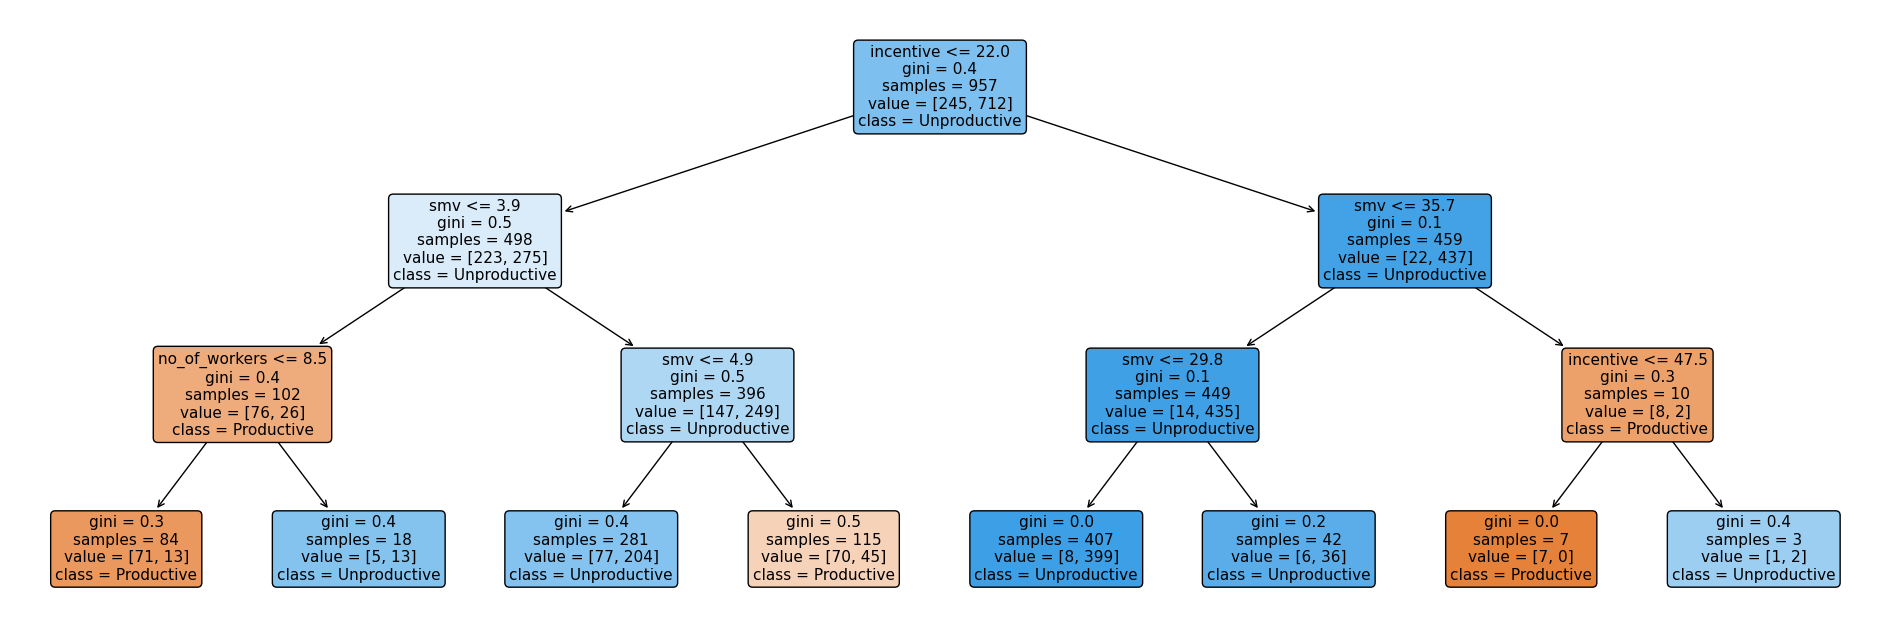

In [31]:
plt.rcParams["figure.figsize"] = [24.0, 8.0]
_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ["Productive", "Unproductive"],
              filled = True,
              precision = 1,
              rounded = True,
              fontsize = 11)
plt.show()

The above chart shows the nodes calculated by the decision tree model. It can be seen that `incentive` (amount of financial incentive (in BDT) that enables or motivates a particular course of action) and `smv` (standard minute value — the allocated time for a task) are the most significant features.  
When creating the tree a max_depth of 3 was set to prune the tree and avoid overfitting.

A hypothetical situation is an `incentive` of 3, `smv` of 12 and `no_of_workers` of 6.  
This would go left at the top node (left is True). It would go right at the next node (right is False). And right again at the next node. This would result in a productive leaf node in this hypothetical situation.

I will now proceed to assess the tree further with alternative metrics

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_test, y_pred)

array([[ 26,  31],
       [ 10, 173]], dtype=int64)

The above confusion matrix gives the numbers predicted correctly & incorrectly in each class

**[True Negatives, False Positives],**

**[False Negatives, True Positives]**

In [33]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.85


In [34]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.95


In [35]:
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

F1 Score: 0.89


All the above metrics are very good. Showing the tree has good performance

To ensure the good metric results aren't by pure chance I will now use cross validation to split the dataset multiple different times and apply the metrics on each split.

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]
Mean Cross Validation Score: 0.82


In [37]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.85
Mean Cross Validated recall: 0.92
Mean Cross Validated F1: 0.88


The metrics remain high even after validation, which is great.

## Explaining The Tree

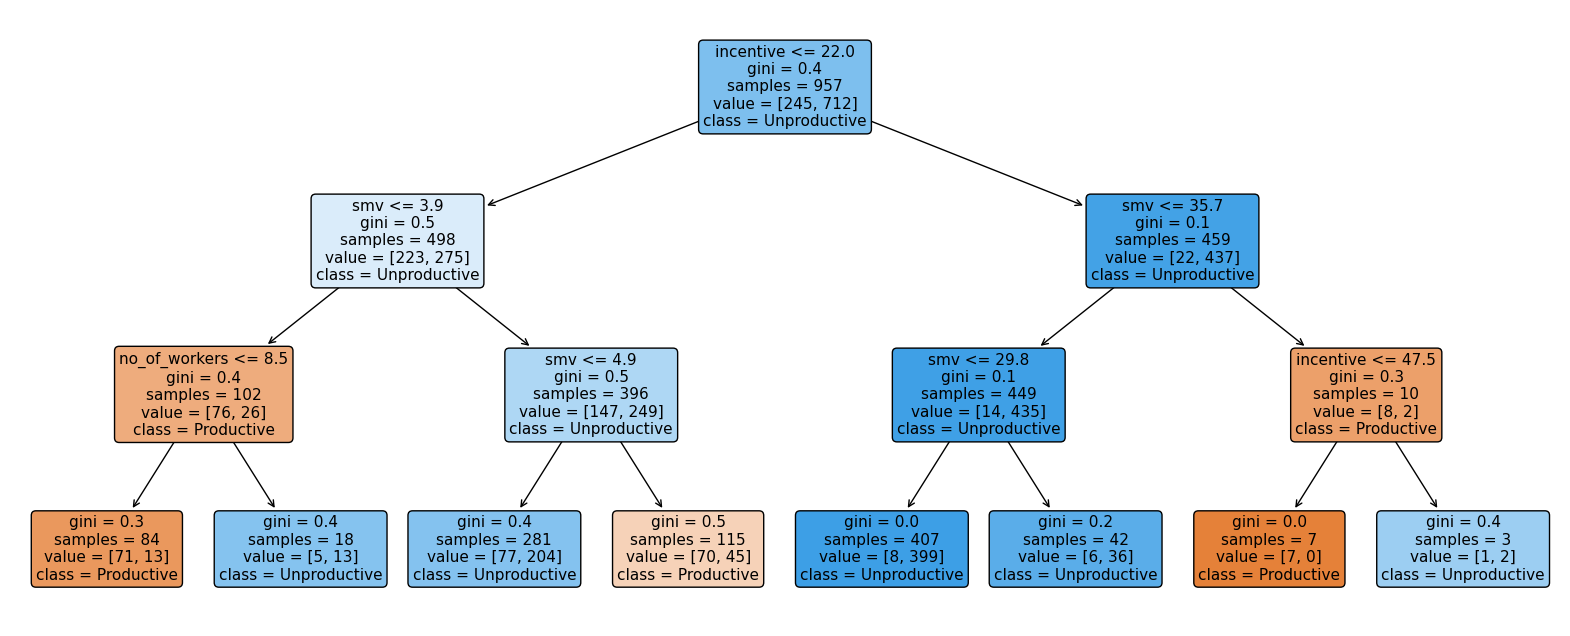

In [38]:
plt.rcParams["figure.figsize"] = [20.0, 8.0]
_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ["Productive", "Unproductive"],
              filled = True,
              precision = 1,
              rounded = True,
              fontsize = 11)
plt.show()

The above is a graphical representation of the calculations made by the machine learning algorithm. This algorithm is called a Decision Tree. It is displayed as an upside down tree, with the root at the top and the leaves at the bottom.  
Each box on the tree is a node, whereby the algorithm splits the data by a value in a column. The column and value it uses can be seen at the top of each node. The algorithm's decision making process can be followed in the tree by following the arrow to the right when the node evaluates to False and the line to the left when it evaluates to True.  
The boxes at the bottom are the leaf nodes. These leaves show us whether the particular observation was productive or not. 
You can see the majority of nodes refer to the incentive and smv columns. This means the algorithm has determined amount of financial incentive  and the allocated time for a task are the most significant variables.  
The algorithm works by generalising the data which can help predict new data. In testing the algorithm's predictions were correct 82% of the time.

## Using Random Forest

Random Forest is an ensemble method, which uses mutiple different decision trees working simulatenously. It can, in some situations, improve accuracy of the predictions.

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(bootstrap = True, oob_score = True)
random_forest.fit(X, y)
round(random_forest.oob_score_,2)

0.84

The above oob score is the accuracy score using all the subsets of the data. At 84% it is only 2% higher than our cross validated decision tree.  
This means I can be confident the orginal algorithm was performing well and was not overfitting.

## Conclusions

Using the results of this project the management team could use the insights to make business decisions to improve productivity.  

Some observations I made during the project:
- Exploring each column is very helpful
- Removing columns with a large amount of nulls or 0's can help results
- String and categorical columns can be used after cleaning and encoding
- plot_tree provides a valuable visualisation of the decision tree
- The process can be easily explained and worked through with examples
- Cross validation and random forest is good to be sure the performance is as reported